In [46]:
#libraries and packages needed:
import csv
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## reliability analysis:

In [47]:
#report vs presentantion:
mpl.rc('font', family = 'serif')
mpl.rc('text', usetex = True)
mpl.rc('text.latex', preamble = r'\usepackage{amsmath}')
mpl.rcParams['figure.figsize'] = [10, 10]

what = 'report' #'presentation'

if what == 'presentation' :
    
    mpl.rcParams['font.size'] = 24
    mpl.rc('xtick', labelsize = 18) 
    mpl.rc('ytick', labelsize = 18)
    annotationstype = False
    cbar_length = 0.7
    
    # levels of theory:
    lots_all = ['B971', 'B3LYP', 'wB97XD', 'M062X', 'B2PLYP']
    lots_h1 = ['B971', 'B3LYP', 'wB97XD'] #h1 = hybrids part 1
    lots_h2 = ['M062X'] #h2 = hybrids part 2
    lots_dh = ['B2PLYP'] #dh = double hybrids
    
    lots_labels = ['B97-1', 'B3LYP', r'$\omega$B97X-D', 'M06-2X', 'B2PLYP']

    # basis sets:
    bss_all = ['6-31Gs', 'pcseg-1', 'AUG-pcseg-1', 'Def2SVPD', 'cc-pVDZ', 'pcseg-2', 'AUG-pcseg-2', 'Def2TZVPD', 'cc-pVTZ']
    bss_dh = ['6-31Gs', 'pcseg-1', 'AUG-pcseg-1', 'Def2SVPD', 'cc-pVDZ', 'pcseg-2', 'Def2TZVPD', 'cc-pVTZ']
    
    bss_labels = ['6-31G*', 'pcseg-1', 'aug-pcseg-1', 'def2-SVPD', 'cc-pVDZ', 'pcseg-2', 'aug-pcseg-2', 'def2-TZVPD', 'cc-pVTZ']
    
elif what == 'report' :
    
    mpl.rcParams['font.size'] = 16
    mpl.rc('xtick', labelsize = 14) 
    mpl.rc('ytick', labelsize = 14)
    annotationstype = True
    cbar_length = 0.5
    
    # levels of theory:
    lots_all = ['B3LYP', 'B971', 'PBE1PBE', 'TPSSh', 'M062X', 'wB97XD', 'B2PLYP', 'B2PLYPD']
    lots_h1 = ['B3LYP', 'B971', 'wB97XD'] #h1 = hybrids part 1
    lots_h2 = ['PBE1PBE', 'TPSSh', 'M062X'] #h2 = hybrids part 2
    lots_dh = ['B2PLYP', 'B2PLYPD'] #dh = double hybrids
    
    lots_labels = ['B3LYP', 'B97-1', 'PBE0', 'TPSSh', 'M06-2X', r'$\omega$B97X-D', 'B2PLYP', 'B2PLYP-D']

    # basis sets:
    bss_all = ['6-31Gs', '6-31Gss', 'pc-1', 'pcseg-1', 'Def2SVP', 'cc-pVDZ', 'AUG-pcseg-1', 'Def2SVPD', 'AUG-cc-pVDZ', 'pc-2', 'pcseg-2', 'Def2TZVPD', 'cc-pVTZ', 'AUG-pcseg-2']
    bss_dh = ['6-31Gs', '6-31Gss', 'pc-1', 'pcseg-1', 'cc-pVDZ', 'AUG-pcseg-1', 'Def2SVPD', 'pc-2', 'pcseg-2', 'Def2TZVPD', 'cc-pVTZ']
    
    bss_labels = ['6-31G*', '6-31G**', 'pc-1', 'pcseg-1', 'def2-SVP', 'cc-pVDZ', 'aug-pcseg-1', 'def2-SVPD', 'aug-cc-pVDZ', 'pc-2', 'pcseg-2', 'def2-TZVPD', 'cc-pVTZ', 'aug-pcseg-2']

In [48]:
#directories:
general_directory = '\\Users\\natia\\OneDrive\\Pulpit\\benchmark paper\\calculations\\output'

successful_run1 = 0 #for h1 run 1
successful_run2 = 0 #for h2 run 2
successful_amount = np.array([]) #for numbers of all successful calculations
successful_percentage = np.array([]) #for percentage of all successful calculations
errors_amount = np.array([]) #for all errors
errors_percentage = np.array([]) #for all errors

In [49]:
for bs in bss_all : #for each basis set
    
    for lot in lots_all : #for each level of theory
        
        if lot in lots_h1 : #h1
            
            files_run1 = glob.glob(f'{general_directory}\\run1\\{lot}_{bs}.csv') #h1 run 1
            files_run2 = glob.glob(f'{general_directory}\\run2\\{lot}_{bs}.csv') #h1 run 2
            files = zip(files_run1, files_run2)
        
            for (file_1, file_2) in files :

                with open(file_1, 'r', encoding = 'utf-8') as current_file_1 : #count no. of successful calc. in run 1

                    reader = csv.reader(current_file_1)
                    data = list(reader)
                    row_count = len(data)

                    successful_run1 = row_count-1
            
                with open(file_2, 'r', encoding = 'utf-8') as current_file_2 : #count no. of successful calc. in run 1

                    reader = csv.reader(current_file_2)
                    data = list(reader)
                    row_count = len(data)

                    successful_run2 = row_count-1
                    
            successful_amount = np.append(successful_amount, successful_run1 + successful_run2) #tot. successful calc. = run 1 + run 2
                    
        elif lot in lots_h2 : #h2
            
            file = f'{general_directory}\\run1\\{lot}_{bs}.csv'

            with open(file, 'r', encoding='utf-8') as current_file : #count no. of successful calc. in run 1
            
                reader = csv.reader(current_file)
                data = list(reader)
                row_count = len(data)
            
            successful_amount = np.append(successful_amount, row_count-1)
            
        elif lot in lots_dh : #dh
            
            if bs not in bss_dh : #check if dh done with this specific bs (dh done with less bs than h1 or h2)
                
                successful_amount = np.append(successful_amount, -1) #no. of successful calc. = -1 if dh not done with this specific bs
            
            else :
                
                file = f'{general_directory}\\run1\\{lot}_{bs}.csv'

                with open(file, 'r', encoding = 'utf-8') as current_file : #count no. of successful calc. in run 1
        
                    reader = csv.reader(current_file)
                    data = list(reader)
                    row_count = len(data)
        
                    successful_amount = np.append(successful_amount, row_count-1)

for s in successful_amount : 
    
    if s == -1 : #no. of errors = -1 if dh not done with specific bs
        
        errors_amount = np.append(errors_amount, -1)
    
    else :
        
        errors_amount = np.append(errors_amount, 141 - s) #no. of errors

#get percentage values:
successful_percentage = np.round((successful_amount/141)*100).astype(int)

for s in successful_percentage : 
    
    if s == -1 : #no. of errors = -1 if dh not done with specific bs
        
        errors_percentage = np.append(errors_percentage, -1)
    
    else :
        
        errors_percentage = np.append(errors_percentage, 100 - s) #no. of errors

In [50]:
#masking dh not done with specific bs:
successful_mask = np.array([], dtype = bool)
errors_mask = np.array([], dtype = bool)

for s in successful_amount : 
    
    if s == -1 :
       
        successful_mask = np.append(successful_mask, True)
        errors_mask = np.append(errors_mask, True)
    
    else :
        
        successful_mask = np.append(successful_mask, False)
        errors_mask = np.append(errors_mask, False)

# reliability heatmaps:

In [51]:
def plot_heatmap(errors, errors_mask, colour_scheme, c, l) : #defining plotting heatmap as function
    
    reliability = errors.reshape(len(bss_all), len(lots_all)).T #reshape data into heatmap shape (.T to get x = bss and y = lot)
    errors_mask = errors_mask.reshape(len(bss_all), len(lots_all)).T #reshape masking data into heatmap shape (.T to get x = bss and y = lot)
    fig, ax = plt.subplots()
    palette = sns.color_palette(colour_scheme, as_cmap = True)

    reliability_heatmap = sns.heatmap(reliability, mask = errors_mask,
                                      vmin = 0, vmax = 18, center = c,
                                      annot = annotationstype,
                                      linewidths = 0.5, linecolor = 'white',
                                      cbar = True, cbar_kws = {'label' : l, 'shrink' : cbar_length, 'extend': 'max'},
                                      square = True, ax = ax,
                                      xticklabels = bss_labels,
                                      yticklabels = lots_labels,
                                      cmap = palette)

    plt.ylabel(r'\textbf{Method}')
    plt.xlabel(r'\textbf{Basis Set}')

    cbar = reliability_heatmap.collections[0].colorbar

    reliability_heatmap.tick_params(axis = 'x')
    reliability_heatmap.tick_params(axis = 'y')

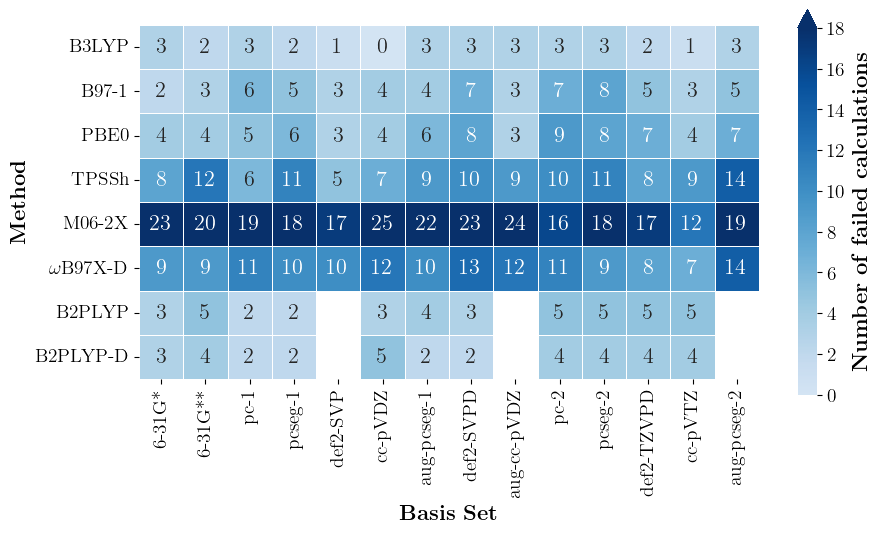

In [52]:
plot_heatmap(errors_amount, errors_mask, 'Blues', 7, r'\textbf{Number of failed calculations}')

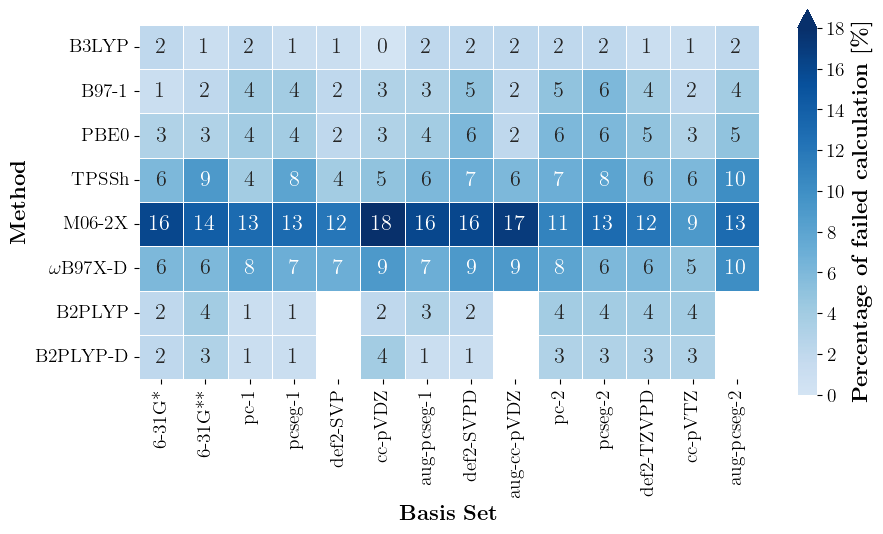

In [53]:
plot_heatmap(errors_percentage, errors_mask, 'Blues', 7, r'\textbf{Percentage of failed calculation [}$\boldsymbol{\%]}$')

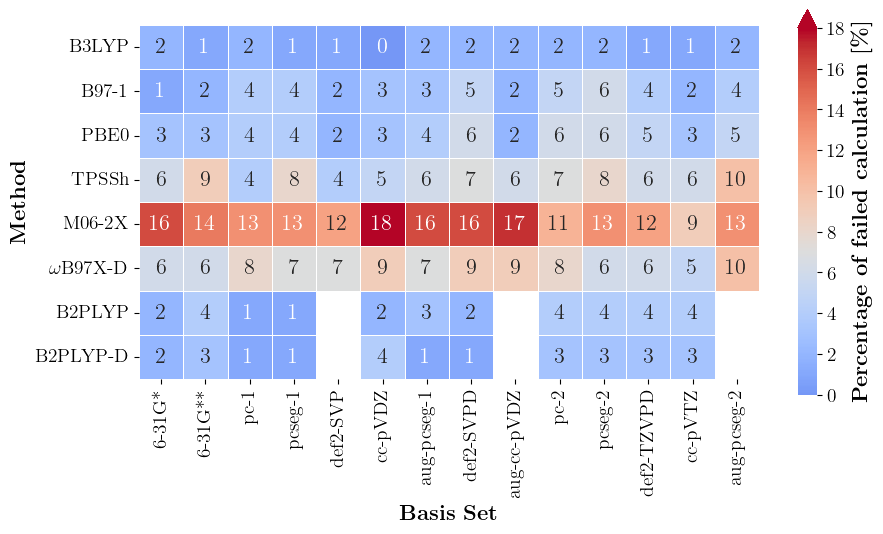

In [54]:
plot_heatmap(errors_percentage, errors_mask, 'coolwarm', 7, r'\textbf{Percentage of failed calculation [}$\boldsymbol{\%]}$')

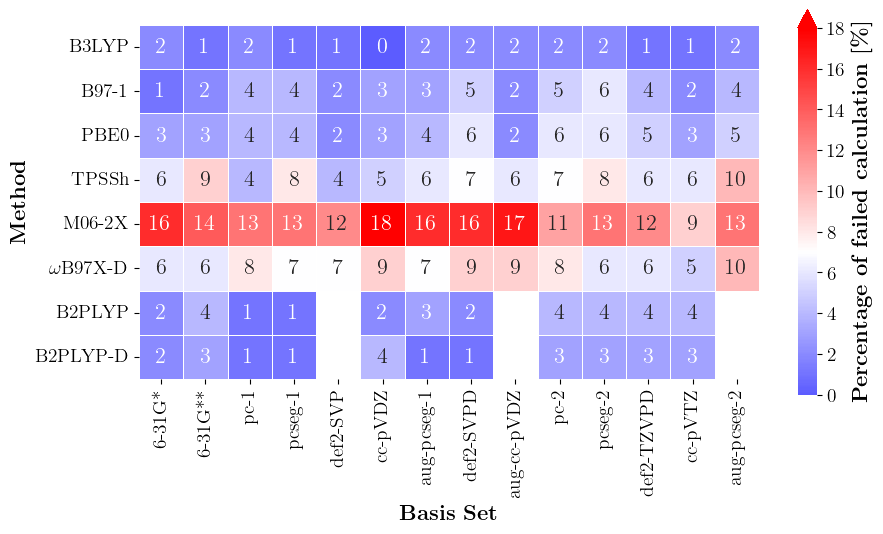

In [55]:
plot_heatmap(errors_percentage, errors_mask, 'bwr', 7, r'\textbf{Percentage of failed calculation [}$\boldsymbol{\%]}$')

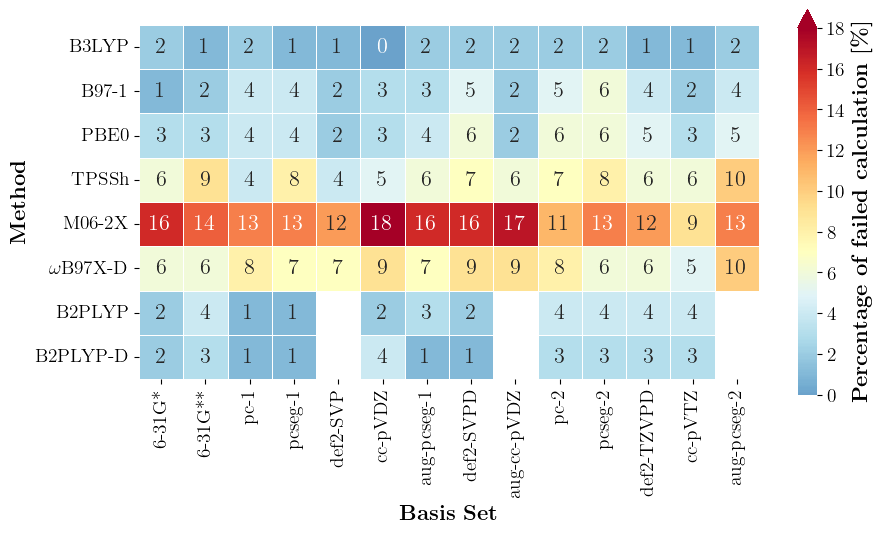

In [56]:
plot_heatmap(errors_percentage, errors_mask, 'RdYlBu_r', 7, r'\textbf{Percentage of failed calculation [}$\boldsymbol{\%]}$')